In [1]:
using Percolation, PyPlot

# Square lattice nearest neighbor

## percolation

In [2]:
site = squarenn(100,0.6)

Percolation.squarenn(100,0.6,[1 1 … 0 1; 0 1 … 1 1; … ; 0 0 … 0 1; 1 1 … 1 0],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],Int64[],Tuple{Int64,Int64}[],Tuple{Int64,Float64}[],0.0,0.0,0)

In [3]:
percolation(site)

1

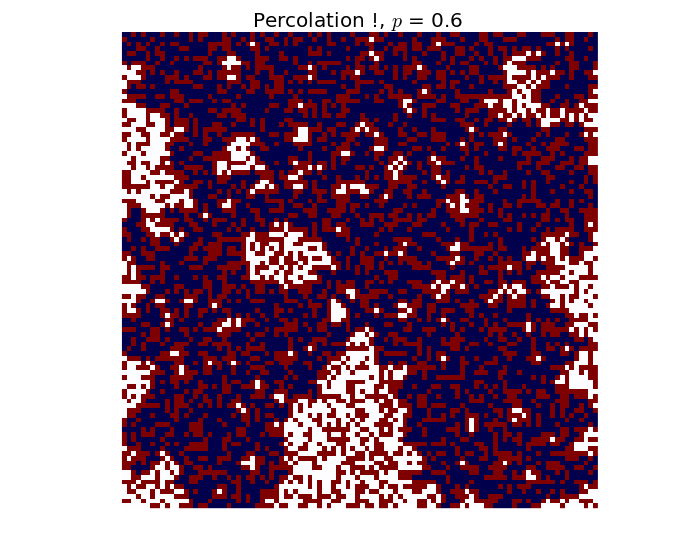

In [4]:
percolationplot(site)

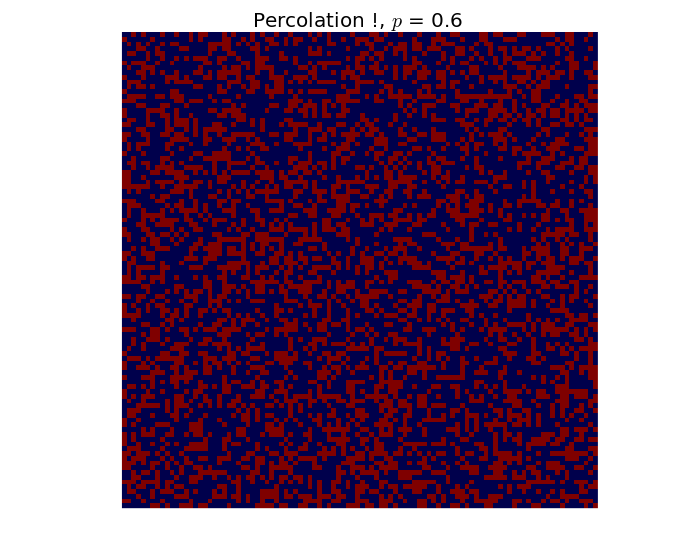

In [5]:
percolationplot(site, waterplot=false)

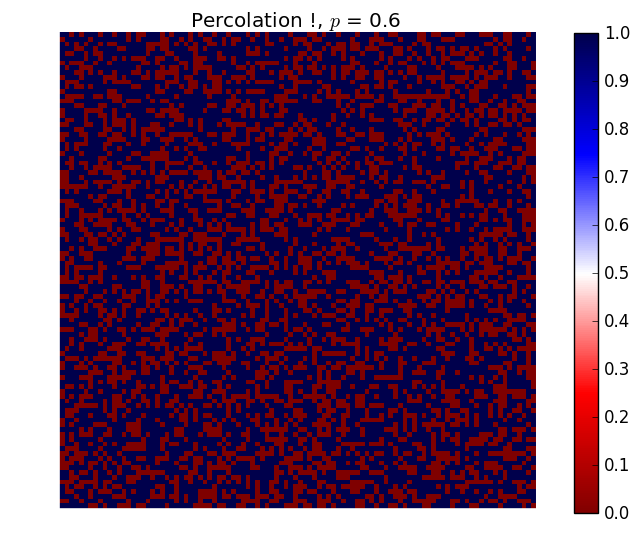

In [6]:
percolationplot(site, waterplot=false, colorbar=true)

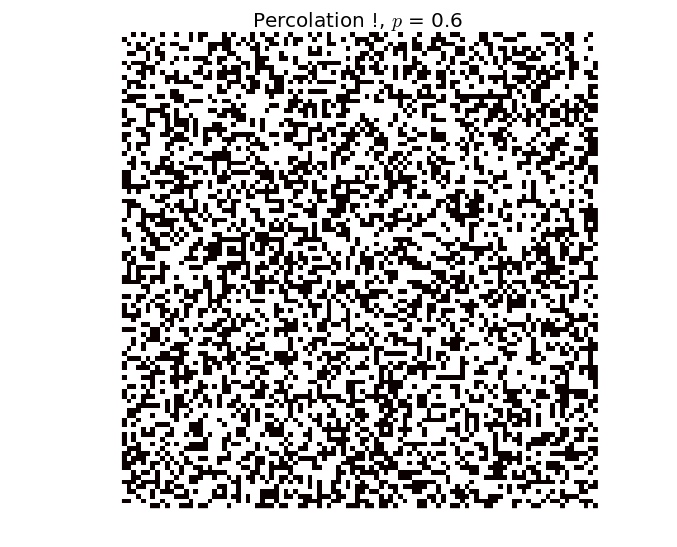

In [7]:
percolationplot(site, waterplot=false, color="hot")

# recursive, Square lattice nearest neighbor

In [8]:
site = squarennrec(100,0.6)

Percolation.squarennrec(100,0.6,[1 1 … 0 0; 1 1 … 1 0; … ; 1 1 … 0 1; 1 0 … 1 1],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],Int64[],Tuple{Int64,Int64}[],Tuple{Int64,Float64}[],0.0,0.0,0)

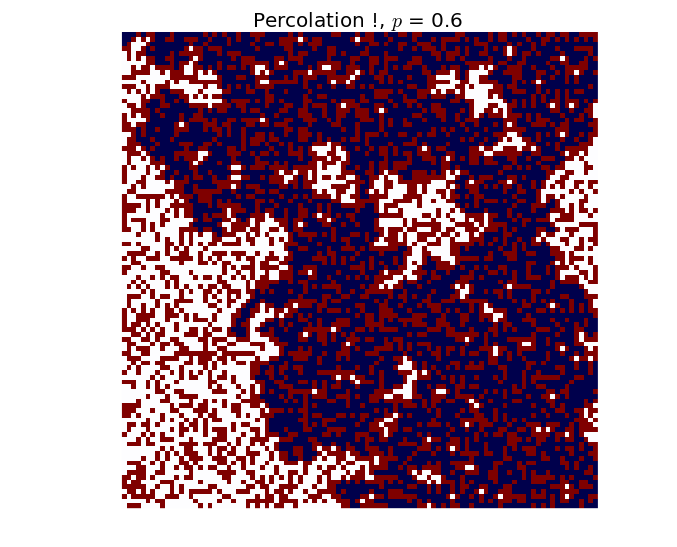

In [9]:
percolation(site)
percolationplot(site)

## cluster

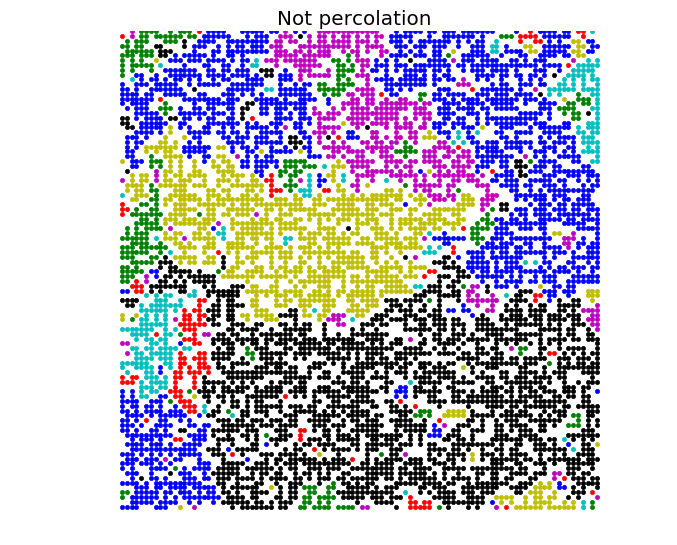

  0.292418 seconds (273.10 k allocations: 65.493 MB, 3.55% gc time)


In [10]:
site = squarenn(100,0.6)
@time cluster(site)
clusterplot(site)

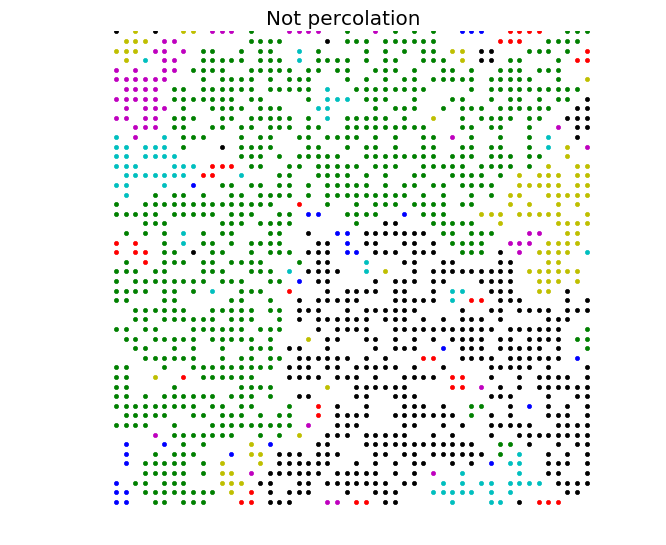

  0.145254 seconds (91.71 k allocations: 6.777 MB, 3.86% gc time)


In [11]:
site = squarennrec(50,0.6)
@time cluster(site)
clusterplot(site)

# Square lattice next nearest neighbor

next nearest neighborはクラスター未対応

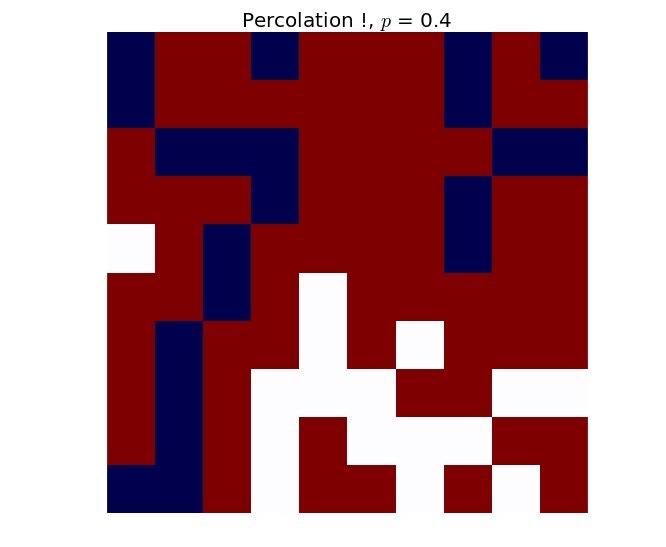

In [12]:
site = squarennn(10,0.4)
percolation(site)
percolationplot(site)

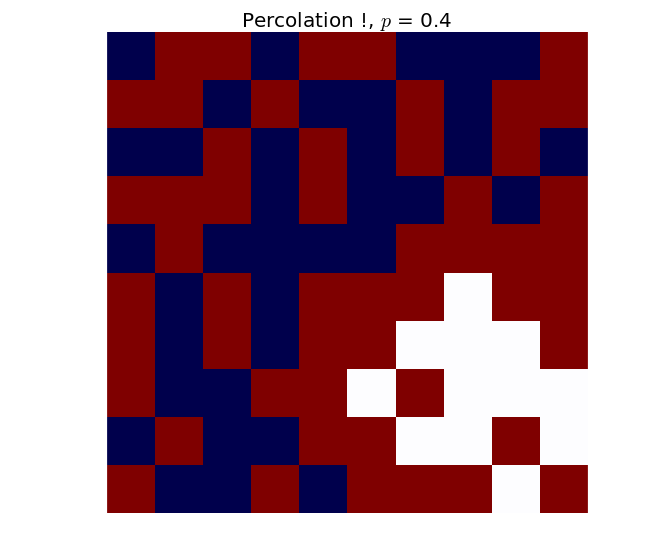

In [13]:
site = squarennnrec(10,0.4)
percolation(site)
percolationplot(site)

# Order parameter

## square nearest neighbor

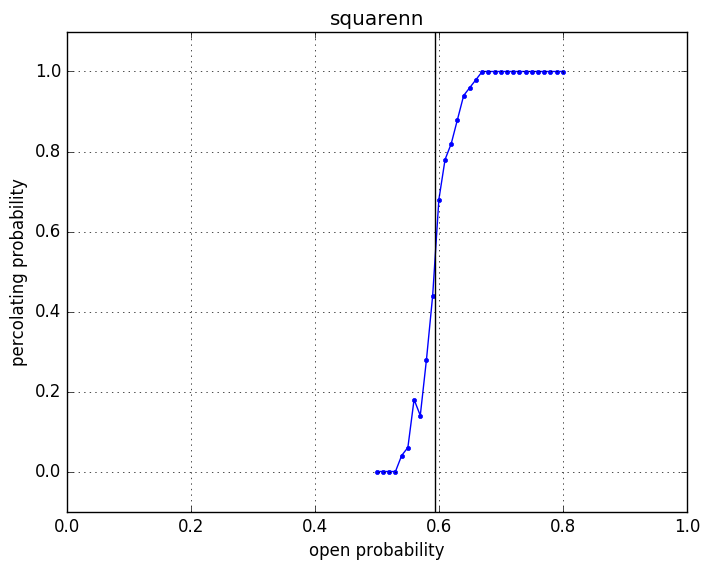

  0.365432 seconds (5.30 M allocations: 556.661 MB, 12.46% gc time)


In [14]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("squarenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

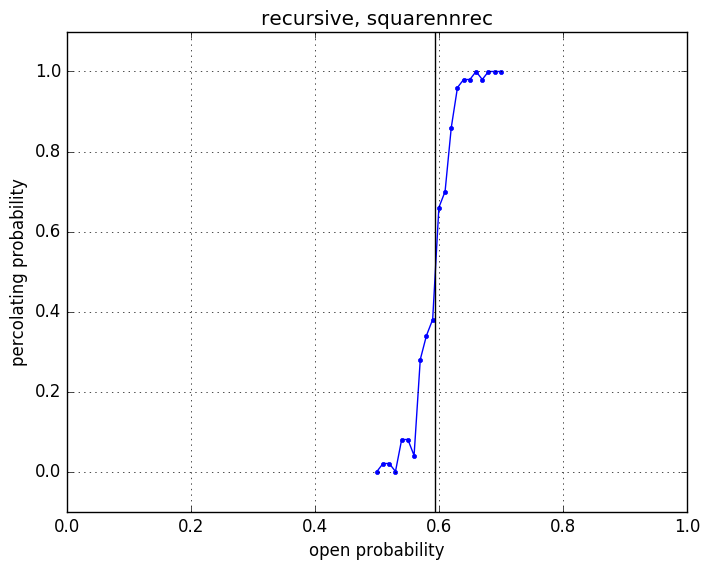

  0.063515 seconds (29.64 k allocations: 70.275 MB, 10.79% gc time)


In [15]:
# recursive, percolation
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

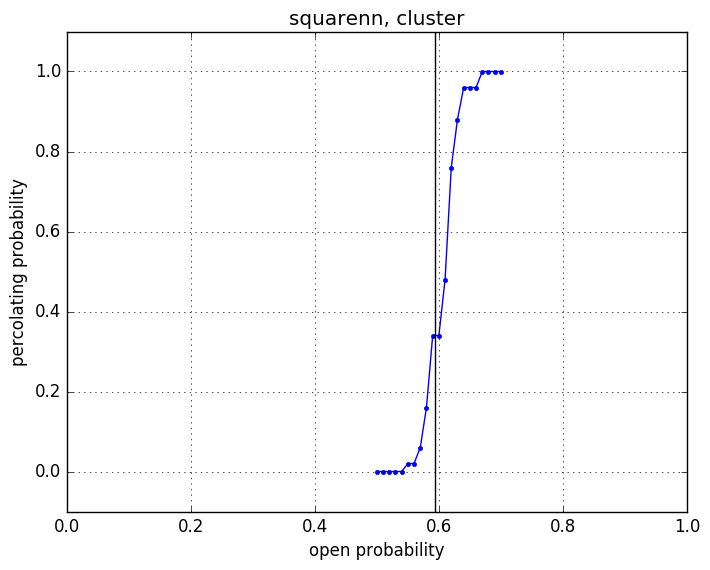

  5.216011 seconds (22.15 M allocations: 16.369 GB, 22.24% gc time)


In [16]:
# cluster
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("squarenn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

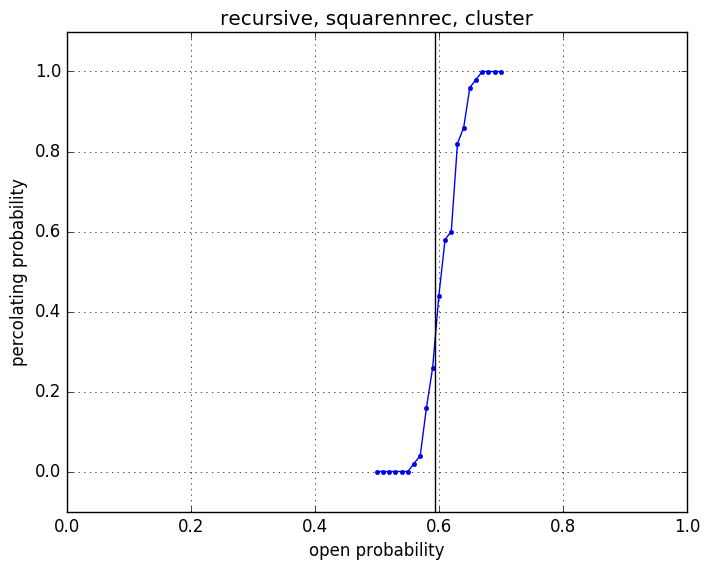

  2.909767 seconds (1.70 M allocations: 9.341 GB, 17.72% gc time)


In [17]:
# recursive, cluster
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## square next nearest neighbor

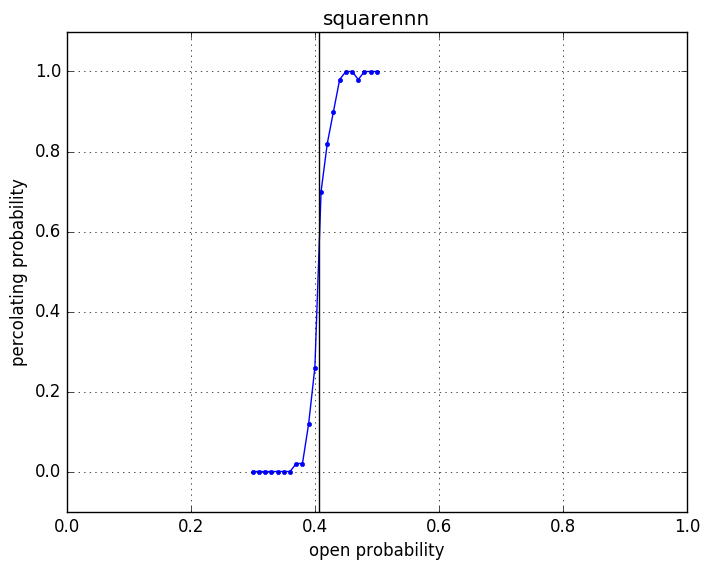

  0.744634 seconds (8.28 M allocations: 972.493 MB, 15.41% gc time)


In [18]:
# percolation
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

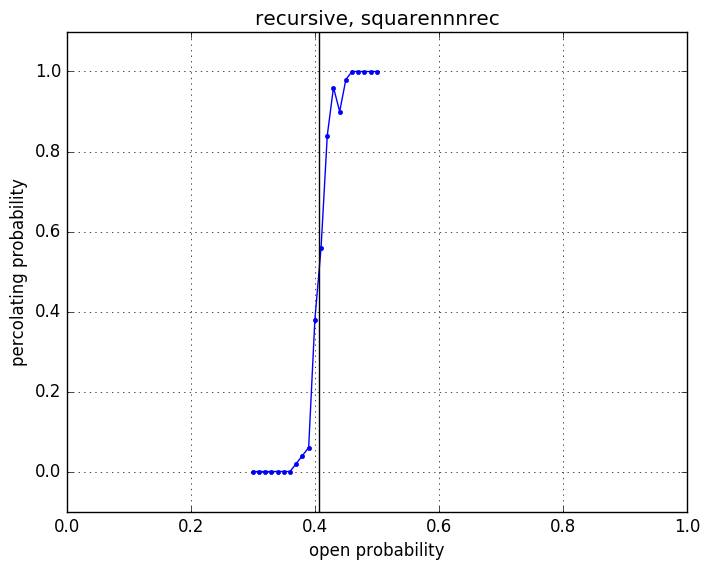

  0.251664 seconds (35.61 k allocations: 260.101 MB, 6.49% gc time)


In [19]:
# percolation
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennnrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

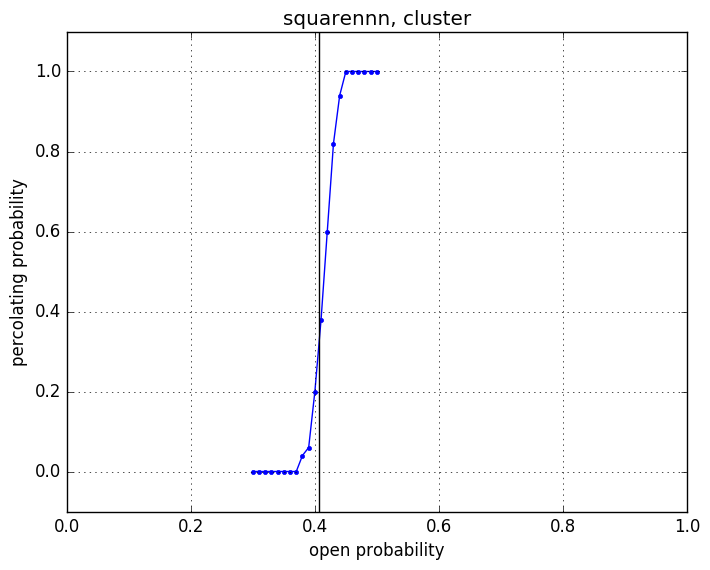

 44.093032 seconds (82.56 M allocations: 155.336 GB, 22.37% gc time)


In [20]:
# cluster
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("squarennn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

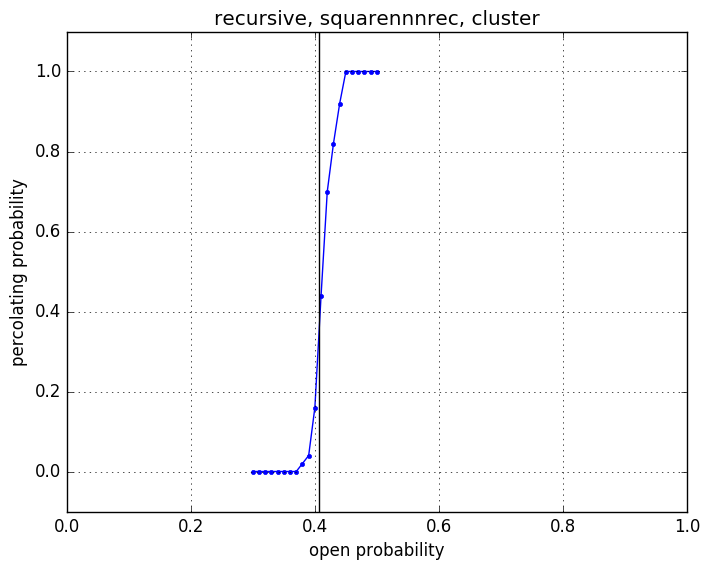

 19.221608 seconds (7.37 M allocations: 63.052 GB, 17.64% gc time)


In [21]:
# cluster
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        cluster(square)
        hit[i] += square.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);